In [2]:
using HDF5, Plots
import LinearAlgebra: norm

In [11]:
function getparameters(folder) 
    # -- list of .h5 files inside "folder"
    files = filter(x->endswith(x, ".h5"), readdir(folder))   
    # -- reverence profile
    fid     = h5open(joinpath(folder,files[1]), "r")
    zref    = read(fid, "River/z")
    zref  .-= zref[1]
    # -- preallocations
    U       = Array{Float64}(undef,length(files))
    βz,rms  = similar(U),similar(U)
    # -- load loop
    @inbounds for i ∈ 1:length(files)
        fid     = h5open(joinpath(folder,files[i]), "r")
        U[i]    = read(fid, "Parameters/U")       # extract uplift
        βz[i]   = read(fid, "Parameters/beta_z")  # extract βz
        z       = read(fid, "River/z")            # extract terrace profile
        z     .-= z[1]
        rms[i]  = norm(zref.-z)  # mismatch between reference and actual profile
    end

    return U,βz,rms
end;

In [53]:
U,βz,rms = getparameters("/Users/albert/Documents/JuliaLandscape/output");

In [71]:
# Unique values of target parameters
Un,βzn = sort(unique(U)),sort(unique(βz));

# Simple analysis via scatter-plot
It should be better to plot $\frac{\partial(error)}{\partial\Psi}$, where $\Psi$ is any arbitrary parameter

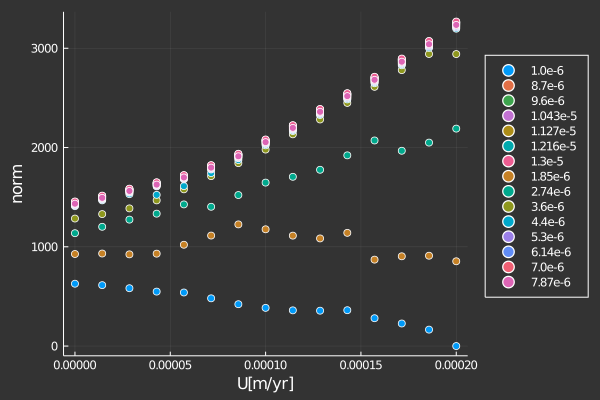

In [63]:
# ---------------------------------------------
# SCATTER PLOT: UPLIFT VS NORM
# --------------------------------------------- 
p=scatter(U[βz.==βzn[1]],rms[βz.==βzn[1]],
    background_color = RGB(0.2, 0.2, 0.2),
    label = string(Float16(βzn[1])))
for i in 2:length(Un)
    scatter!(p,U[βz.==βzn[i]],rms[βz.==βzn[i]], 
        label = string(Float16(βzn[i])),
        legend=:outerright )
end
xlabel!("U[m/yr]")
ylabel!("norm")
p

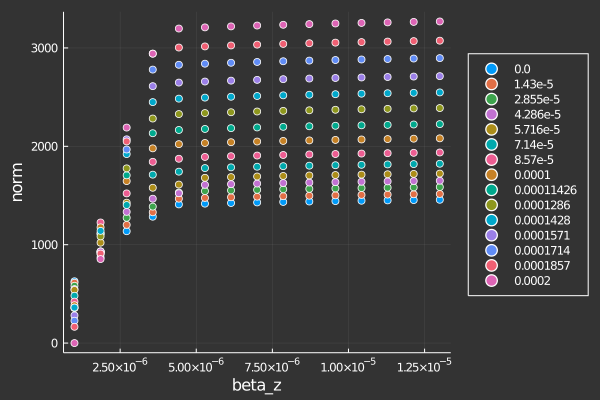

In [70]:
# ---------------------------------------------
# SCATTER PLOT: BETA_Z VS NORM
# ---------------------------------------------
p=scatter(βz[U.==Un[1]],rms[U.==Un[1]],
    background_color = RGB(0.2, 0.2, 0.2),
    label = string(Float16(Un[1])))
for i in 2:length(Un)
    scatter!(p,βz[U.==Un[i]],rms[U.==Un[i]], 
        label = string(Float16(Un[i])),
        legend=:outerright )
end
xlabel!("beta_z")
ylabel!("norm")
p

In [61]:
# isort = sortperm(U)
# Us    = U[isort]
# βzs   = βz[isort]
# ers   = rms[isort]
# R     = ers' .* ones(length(U))
# scatter3d(U,βz,R)